In [11]:
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import glob


In [12]:
#image input
images= []
images = [cv2.imread(file) for file in glob.glob("C:/Users/adiiz/Documents/other/cs_project/input_pictures/*.jpg")]


In [4]:
test_image=images[1]
#cv2.imshow("test", test_image)
#cv2.waitKey(0)
#conver to rgb
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB) 

# resize the image
test_image_resized = cv2.resize(test_image_rgb, (160, 160))
# Detect face locations in the image
face_locations1 = face_recognition.face_locations(test_image_rgb)
face_encoding1=face_recognition.face_encodings(test_image_rgb, face_locations1)[0]
print(face_encoding1[0])



-0.028749726712703705


In [5]:
image=images[0]
#conver to rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

# resize the image
image_resized = cv2.resize(image_rgb, (160, 160))
# Detect face locations in the image
face_locations = face_recognition.face_locations(image_rgb)
face_encoding=face_recognition.face_encodings(image_rgb, face_locations)[0]
print(face_encoding[0])


-0.06358775496482849


In [6]:
face_recognition.compare_faces([face_encoding1], face_encoding)[0]

True

In [14]:
#first encoding

known_faces=[]

first_img=images[0]
first_img_rgb = cv2.cvtColor(first_img, cv2.COLOR_BGR2RGB) 
first_img_resized = cv2.resize(first_img_rgb, (160, 160))
first_face_locations = face_recognition.face_locations(first_img_rgb)
first_face_encoding=face_recognition.face_encodings(first_img_rgb, face_locations)[0]

known_encodings=np.array([first_face_encoding])
known_faces.append([first_img])

In [15]:
for image in images[1:]:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image_resized = cv2.resize(image_rgb, (160, 160))
    face_locations = face_recognition.face_locations(image_rgb)
    face_encoding=face_recognition.face_encodings(image_rgb, face_locations)[0]

    match_found = False
    # Loop through known encodings to see if we have a match
    for idx, known_encoding in enumerate(known_encodings):
        if face_recognition.compare_faces([known_encoding], face_encoding)[0]:
            # If match found, append the image to the corresponding list in known_faces
            known_faces[idx].append(image)
            match_found = True
            break
    
    if not match_found:
        # If no match is found, add the new encoding and corresponding image
        known_encodings = np.vstack([known_encodings, face_encoding]) if known_encodings.size else np.array([face_encoding])
        
        # Add a new list with the current image for the new face encoding
        known_faces.append([image])

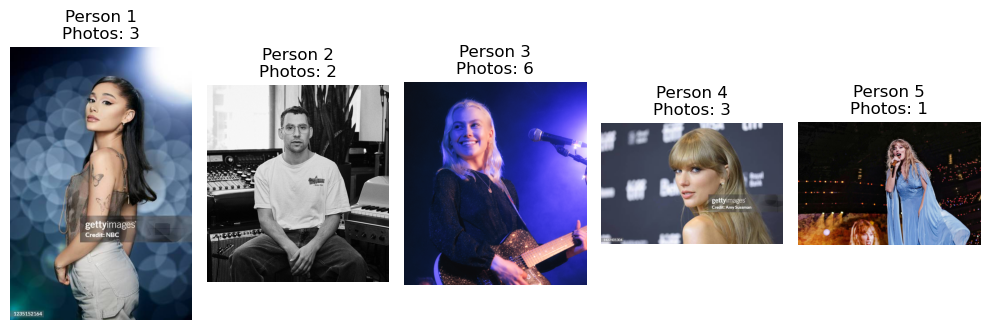

In [17]:
num_faces = len(known_faces)

# Create a figure to hold the images
plt.figure(figsize=(10, 5))

# Iterate through known_faces and plot one image for each person
for i in range(num_faces):
    # Select the first image for each person
    image_to_display = known_faces[i][0]  # Get the first image from the list of images for each person
    
    # Convert from BGR to RGB (if using OpenCV, since it loads images in BGR format)
    image_to_display_rgb = cv2.cvtColor(image_to_display, cv2.COLOR_BGR2RGB)
    
    # Get the number of photos for the current person
    num_photos = len(known_faces[i])
    
    # Plot the image
    plt.subplot(1, num_faces, i + 1)  # 1 row, num_faces columns, index starts at 1
    plt.imshow(image_to_display_rgb)
    plt.axis('off')  # Hide the axes
    plt.title(f'Person {i + 1}\nPhotos: {num_photos}')  # Title includes number of photos

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

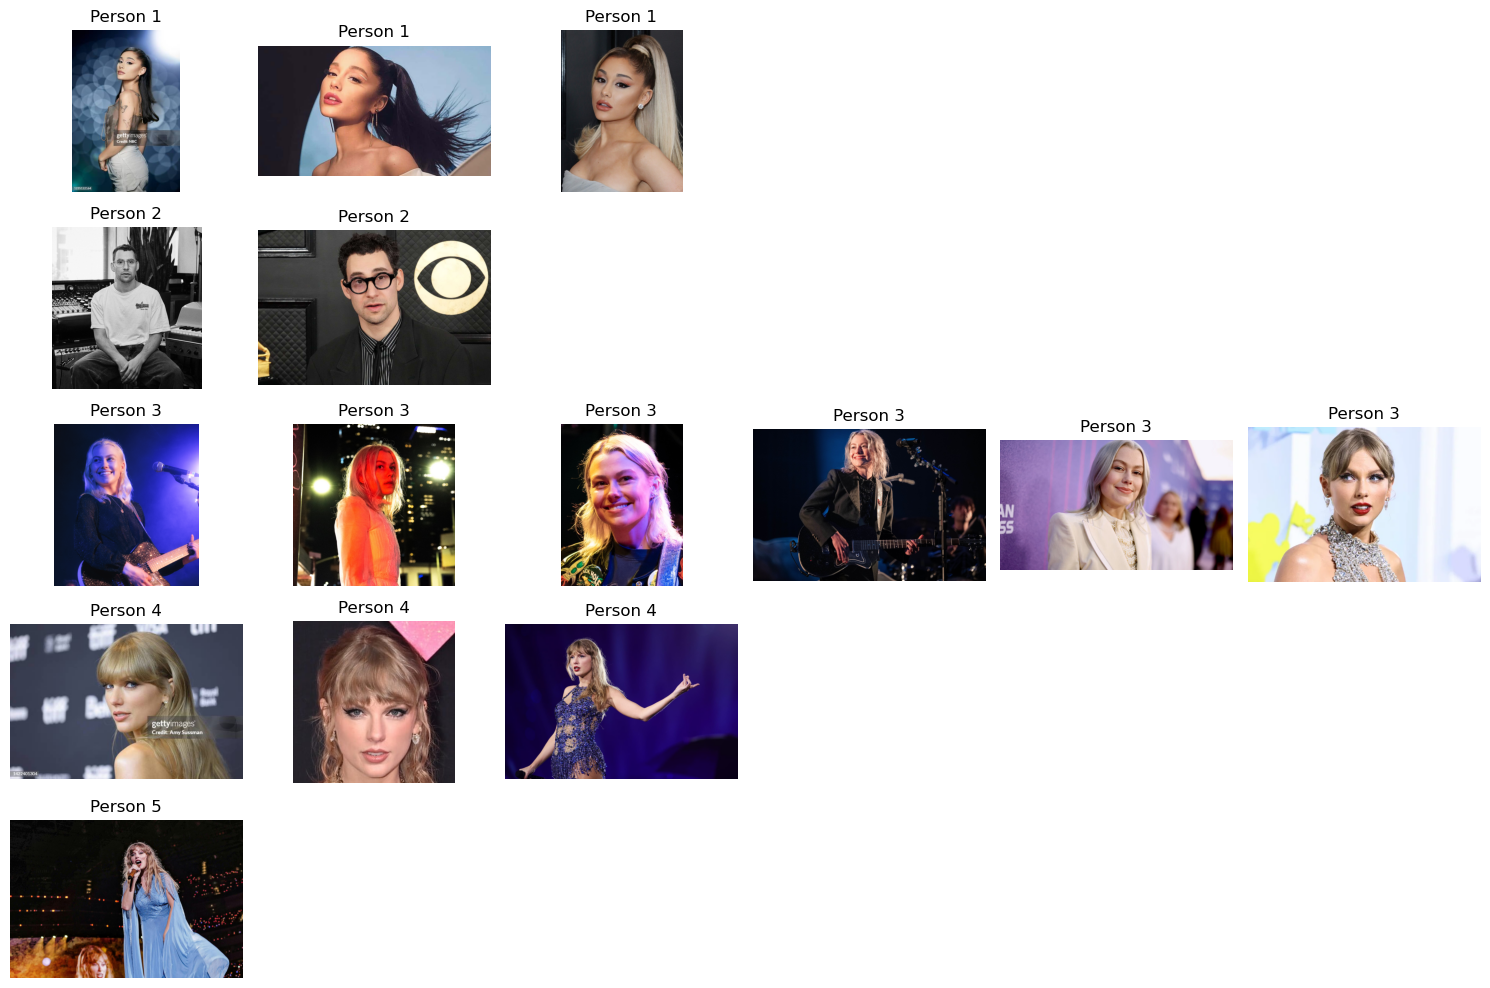

In [18]:
plt.figure(figsize=(15, 10))  # Adjust the size as needed

# Iterate through known_faces to plot all images for each person
for person_index, images in enumerate(known_faces):
    # Iterate through each image for the current person
    for image_index, image in enumerate(images):
        # Convert from BGR to RGB (if using OpenCV)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Calculate subplot position: person_index * max_images_per_row + image_index + 1
        plt.subplot(len(known_faces), max(len(images) for images in known_faces), 
                    person_index * max(len(images) for images in known_faces) + image_index + 1)

        # Plot the image
        plt.imshow(image_rgb)
        plt.axis('off')  # Hide the axes
        plt.title(f'Person {person_index + 1}')  # Title for each person's images

# Adjust layout and show the plot
plt.tight_layout()
plt.show()